<h1 align="center">Soil Fertility Prediction System</h1>



The **Soil Fertility Dataset** contains nutrient concentration values essential for determining the fertility class of soil—categorized as **Low**, **Medium**, or **High**.  
These features represent the core macro-nutrients required for healthy plant growth and are widely used in agricultural analytics and crop recommendation systems.

---

## 🧪 Features Included in the Dataset

### 1. 🌿 Nitrogen
- Represents the nitrogen content present in the soil.
- Plays a vital role in **leaf growth** and **chlorophyll formation**.

### 2. 🌻 Phosphorous
- Measures the phosphorus level available to plants.
- Supports **root development** and **energy transfer** in plants.

### 3. 🥔 Potassium
- Indicates the potassium concentration in the soil.
- Enhances **disease resistance**, water regulation, and overall crop quality.

### 4. 🍃 Content of Nitrogen
- Detailed nitrogen concentration value measured in mg/kg.
- Helps in identifying soil’s ability to support vegetative growth.

### 5. 🌾 Content of Phosphorous
- Detailed phosphorus measurement providing nutrient availability insights.
- Crucial for **fruiting**, **flowering**, and **seed formation**.

### 6. 🍠 Content of Potassium
- Advanced measurement of available potassium.
- Important for **stress tolerance**, **enzyme activation**, and **protein synthesis**.

---

## 🎯 Target Variable (if included)

### 🌱 Soil Fertility Class
- Categorized as: **Low**, **Medium**, **High**
- Used for **multiclass classification** based on nutrient levels.

---

## 🧑‍🌾 Use Case Application

This dataset is ideal for:
- Soil fertility prediction  
- Crop recommendation  
- Precision agriculture  
- Nutrient optimization models  



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("DataSet/soildataset.csv")

In [3]:
df.head()

,Id,Nitrogen,Phosphorous,Potassium,Content of Nitrogen,Content of Phosphorous,Content of Potassium
0,1,3.67,2.45,2.990,Low,Low,High
1,2,3.99,2.51,2.890,Medium,Low,High
2,3,4.31,2.57,2.019,High,Low,Low
3,4,3.53,2.63,3.040,Low,Low,High
4,5,3.56,2.69,2.880,Low,Low,High


In [4]:
df.isnull().sum()

Id                        0
Nitrogen                  0
Phosphorous               0
Potassium                 0
Content of Nitrogen       0
Content of Phosphorous    0
Content of Potassium      0
dtype: int64

In [5]:
df.describe()

,Id,Nitrogen,Phosphorous,Potassium
count,150.000000,150.000000,150.000000,150.000000
mean,75.500000,4.041290,2.966672,2.484721
std,43.445368,0.399017,0.458579,0.458313
min,1.000000,2.987000,2.026000,1.180000
25%,38.250000,3.884225,2.567366,2.097424
50%,75.500000,4.025039,2.882300,2.563290
75%,112.750000,4.200106,3.276475,2.897892
max,150.000000,4.972300,4.015000,3.260000


In [6]:
df.columns

Index(['Id', 'Nitrogen', 'Phosphorous', 'Potassium', 'Content of Nitrogen',
       'Content of Phosphorous', 'Content of Potassium'],
      dtype='object')

In [13]:
ls=['Content of Nitrogen','Content of Phosphorous', 'Content of Potassium']
for i in ls:
    print(df[i].value_counts())
    print("*"*50)

Content of Nitrogen
Medium    88
High      38
Low       24
Name: count, dtype: int64
**************************************************
Content of Phosphorous
Low       64
Medium    51
High      35
Name: count, dtype: int64
**************************************************
Content of Potassium
Medium    52
High      50
Low       48
Name: count, dtype: int64
**************************************************


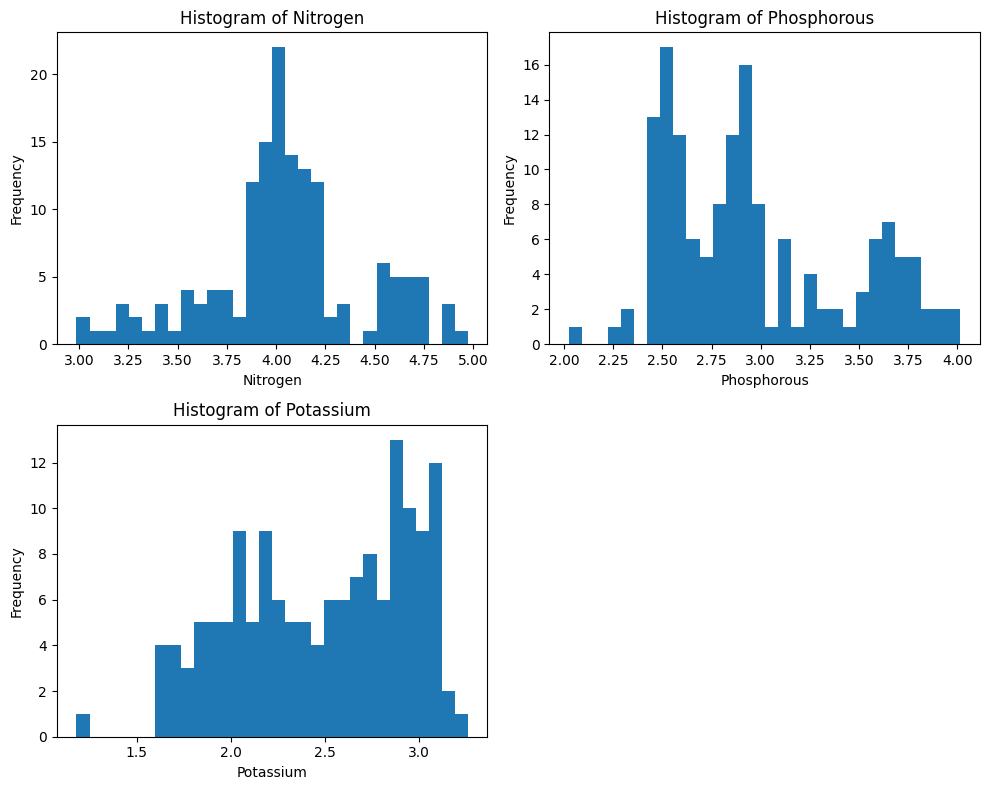

In [14]:
numeric_cols = ["Nitrogen", "Phosphorous", "Potassium"]
plt.figure(figsize=(10,8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)     
    plt.hist(df[col], bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

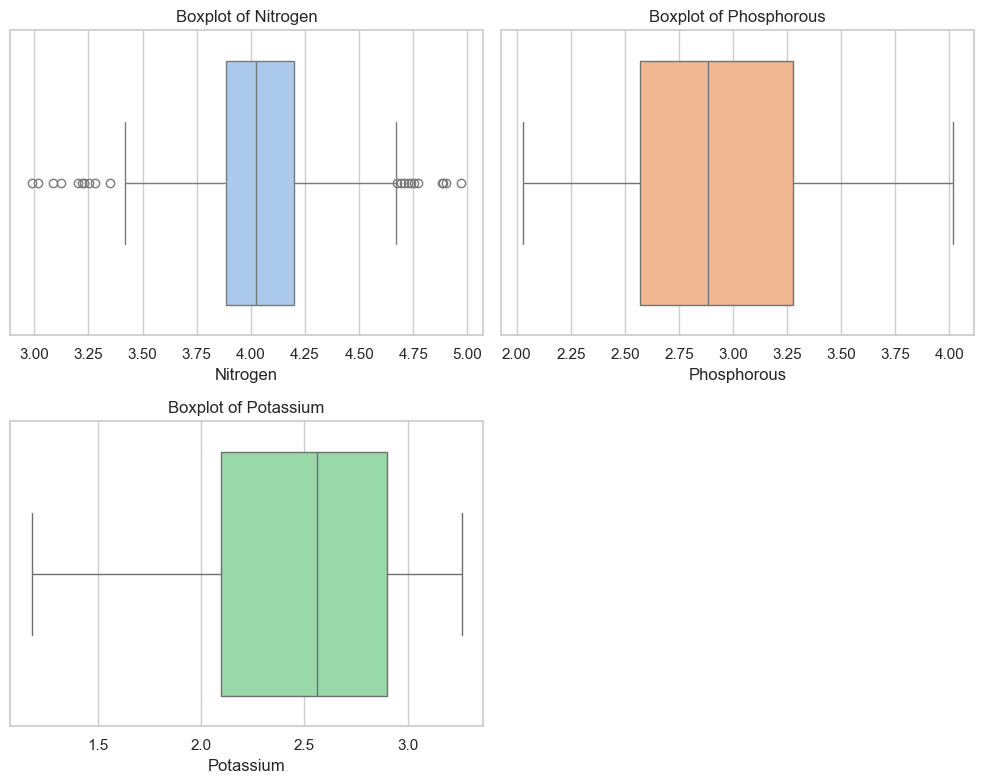

In [15]:
numeric_cols = ["Nitrogen", "Phosphorous", "Potassium"]
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
palette = sns.color_palette("pastel")
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x=col, color=palette[i % len(palette)])
    plt.title(f"Boxplot of {col}", fontsize=12)
    plt.xlabel(col)
plt.tight_layout()
plt.show()


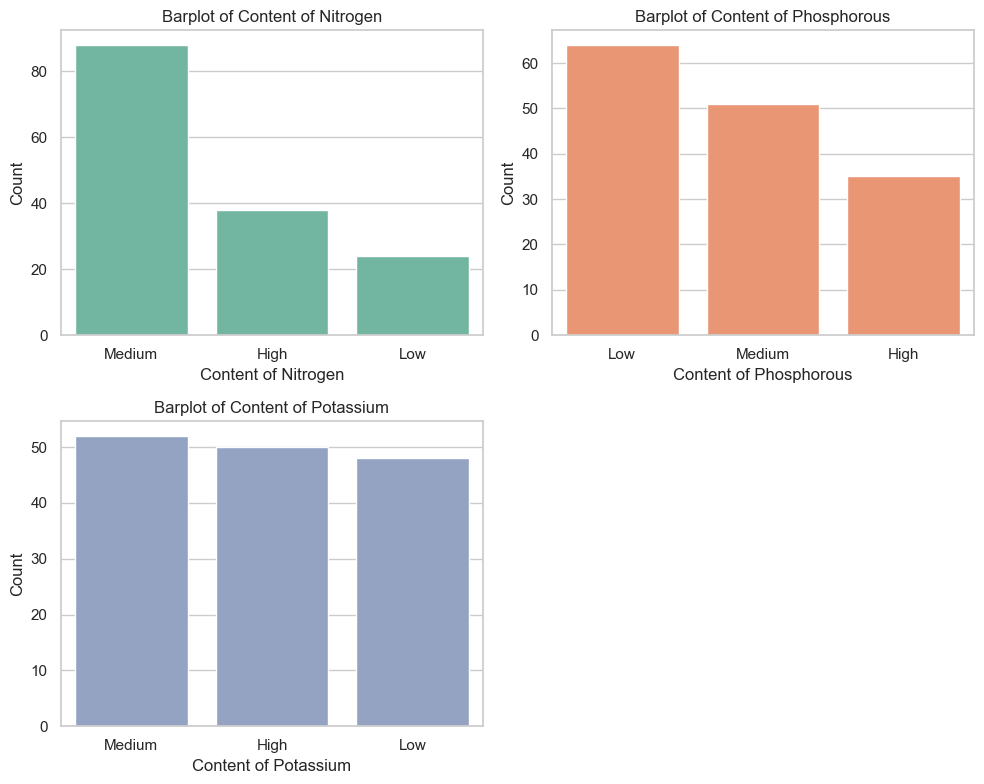

In [18]:
Cat_col = ['Content of Nitrogen', 'Content of Phosphorous', 'Content of Potassium']
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2")
for i, col in enumerate(Cat_col):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values,
                hue=None, color=palette[i % len(palette)])
    plt.title(f"Barplot of {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [23]:
numeric_cols = ["Nitrogen", "Phosphorous", "Potassium"]
for col in numeric_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)
print("Outliers capped successfully!")


Outliers capped successfully!


In [32]:
X = df.iloc[:,:-3]

,Nitrogen,Phosphorous,Potassium
0,3.670000,2.450000,2.990000
1,3.990000,2.510000,2.890000
2,4.310000,2.570000,2.019000
3,3.530000,2.630000,3.040000
4,3.560000,2.690000,2.880000
...,...,...,...
145,3.748050,3.112400,3.067096
146,3.582990,2.592593,3.067762
147,3.417931,2.552753,3.068428
148,3.252871,2.512913,3.069094


In [38]:
X.columns

Index(['Nitrogen', 'Phosphorous', 'Potassium'], dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
df = df.iloc[:,:-3]
print(f"Data shape: {X.shape}")
print(df.head())
print("\n" + "="*50 + "\n")


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = KMeans(random_state=42, n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,10), timings=False) 
print("--- Running Elbow Method to find optimal 'k' ---")
visualizer.fit(X_scaled) 
visualizer.show() 
optimal_k = 3 
print(f"\nOptimal number of clusters (k) chosen: **{optimal_k}**")
print("\n" + "="*50 + "\n")
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df['Fertility_Cluster'] = kmeans.fit_predict(X_scaled)

print("--- Clustering Results ---")
print("Cluster counts:")
print(df['Fertility_Cluster'].value_counts())
cluster_means = df.groupby('Fertility_Cluster')[features].mean().sort_values(by='Nitrogen_ppm')
print("\nMean NPK for each cluster (Lowest to Highest Nitrogen):")
print(cluster_means)
label_map = {
    cluster_means.index[0]: 'Low_Fertility',
    cluster_means.index[1]: 'Medium_Fertility',
    cluster_means.index[2]: 'High_Fertility'
}

df['Fertility_Label'] = df['Fertility_Cluster'].map(label_map)

print("\nFinal Data with Fertility Labels:")
print(df[['Nitrogen_ppm', 'Phosphorous_ppm', 'Fertility_Label']].head(10))
print("\n" + "="*50 + "\n")


# --- 5. Visualize the Clusters ---
# We'll plot Nitrogen vs. Phosphorous, colored by the assigned cluster.

plt.figure(figsize=(10, 6))
# Create a scatter plot of Nitrogen vs Phosphorous, using the labels for color
scatter = plt.scatter(
    df['Nitrogen_ppm'], 
    df['Phosphorous_ppm'], 
    c=df['Fertility_Cluster'], # Color based on the cluster number
    cmap='viridis', 
    s=100, 
    alpha=0.8
)

# Plot the cluster centers (the means of each cluster)
plt.scatter(
    kmeans.cluster_centers_[:, features.index('Nitrogen_ppm')],
    kmeans.cluster_centers_[:, features.index('Phosphorous_ppm')],
    marker='X', # Use 'X' to denote the center
    s=300, 
    c='red', 
    label='Cluster Centers'
)

plt.title('K-Means Clustering of Soil Fertility (Nitrogen vs. Phosphorous)')
plt.xlabel('Nitrogen Content (ppm)')
plt.ylabel('Phosphorous Content (ppm)')
plt.legend(handles=scatter.legend_elements()[0], labels=label_map.values(), title="Fertility Zone")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [33]:
df = df.iloc[:,:-3]
print(f"Data shape: {df.shape}")
print(df.head())

Data shape: (150, 3)
   Nitrogen  Phosphorous  Potassium
0      3.67         2.45      2.990
1      3.99         2.51      2.890
2      4.31         2.57      2.019
3      3.53         2.63      3.040
4      3.56         2.69      2.880




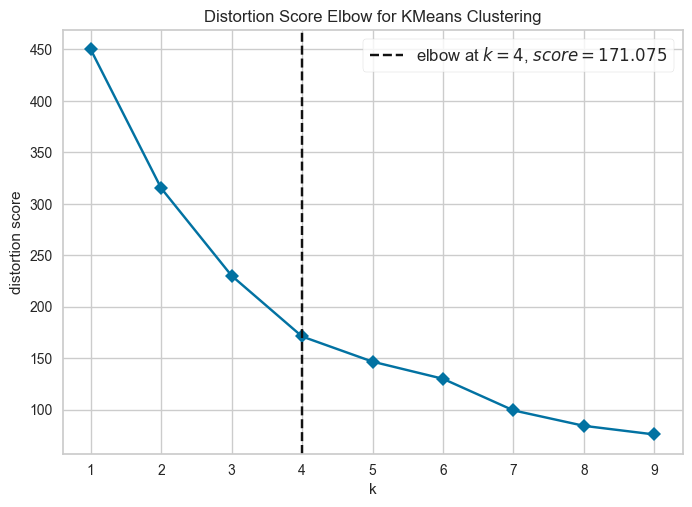

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = KMeans(random_state=42, n_init='auto')
visualizer = KElbowVisualizer(model, k=(1,10), timings=False) 
visualizer.fit(X_scaled) 
visualizer.show()

In [36]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
df['Fertility_Cluster'] = kmeans.fit_predict(X_scaled)

In [41]:
print(df['Fertility_Cluster'].value_counts())
cluster_means = df.groupby('Fertility_Cluster')[['Nitrogen', 'Phosphorous', 'Potassium']].mean().sort_values(by='Nitrogen')
print("\nMean NPK for each cluster (Lowest to Highest Nitrogen):")
print(cluster_means)

Fertility_Cluster
0    68
1    43
2    39
Name: count, dtype: int64

Mean NPK for each cluster (Lowest to Highest Nitrogen):
                   Nitrogen  Phosphorous  Potassium
Fertility_Cluster                                  
2                  3.614919     2.797134   2.892027
0                  4.120494     2.688701   2.291552
1                  4.303752     3.565044   2.427163


In [42]:
label_map = {
    cluster_means.index[0]: 'Low_Fertility',
    cluster_means.index[1]: 'Medium_Fertility',
    cluster_means.index[2]: 'High_Fertility'
}

df['Fertility_Label'] = df['Fertility_Cluster'].map(label_map)

In [43]:
df.head()

,Nitrogen,Phosphorous,Potassium,Fertility_Cluster,Fertility_Label
0,3.67,2.45,2.990,2,Low_Fertility
1,3.99,2.51,2.890,2,Low_Fertility
2,4.31,2.57,2.019,0,Medium_Fertility
3,3.53,2.63,3.040,2,Low_Fertility
4,3.56,2.69,2.880,2,Low_Fertility


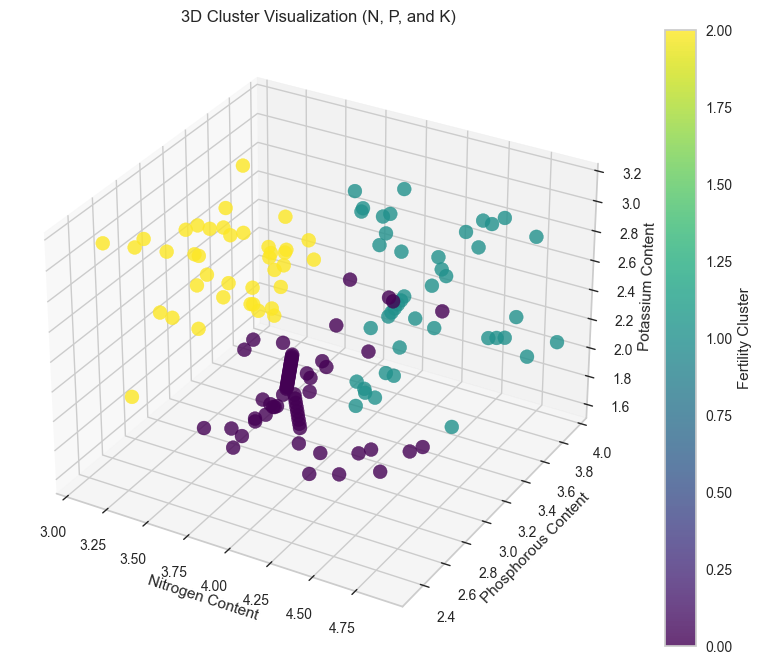

In [47]:
# Import the necessary 3D module
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
# Add a 3D subplot to the figure
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    # X-axis: Nitrogen
    df['Nitrogen'],
    # Y-axis: Phosphorous
    df['Phosphorous'],
    # Z-axis: Potassium
    df['Potassium'],
    # Color (c) based on the cluster label
    c=df['Fertility_Cluster'],
    cmap='viridis',
    s=100,
    alpha=0.8
)

ax.set_title('3D Cluster Visualization (N, P, and K)')
ax.set_xlabel('Nitrogen Content')
ax.set_ylabel('Phosphorous Content')
ax.set_zlabel('Potassium Content')
plt.colorbar(scatter, label='Fertility Cluster')
plt.show()

In [48]:
from sklearn.preprocessing import LabelEncoder
df['Fertility_Label']=LabelEncoder().fit_transform(df['Fertility_Label'])

In [49]:
df.head()

,Nitrogen,Phosphorous,Potassium,Fertility_Cluster,Fertility_Label
0,3.67,2.45,2.990,2,1
1,3.99,2.51,2.890,2,1
2,4.31,2.57,2.019,0,2
3,3.53,2.63,3.040,2,1
4,3.56,2.69,2.880,2,1


In [50]:
df.drop(columns=['Fertility_Cluster'],inplace=True)

In [57]:
df.head()

,Nitrogen,Phosphorous,Potassium,Fertility_Label
0,3.67,2.45,2.990,1
1,3.99,2.51,2.890,1
2,4.31,2.57,2.019,2
3,3.53,2.63,3.040,1
4,3.56,2.69,2.880,1


In [52]:
df.Fertility_Label.value_counts()

Fertility_Label
2    68
0    43
1    39
Name: count, dtype: int64

In [60]:
X = df[['Nitrogen','Phosphorous','Potassium']]
y = df.iloc[:,-1]

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [63]:
X_train

,Nitrogen,Phosphorous,Potassium
137,4.707598,3.408714,2.981180
84,4.211348,2.470539,2.691896
27,3.905225,2.846000,2.090958
127,4.553550,3.804368,2.078305
132,4.630574,2.900240,1.916429
...,...,...,...
9,4.000000,2.708000,2.560000
103,3.868100,2.939841,2.988109
67,4.120048,2.566488,2.426864
117,3.851154,3.601700,2.986385


In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std =sc.fit_transform(X_test)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification 

# --- Import all selected classification models ---
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, 
    GradientBoostingClassifier, 
    BaggingClassifier, 
    AdaBoostClassifier
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
classifiers = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42),
    "Linear Discriminant Analysis (LDA)": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis (QDA)": QuadraticDiscriminantAnalysis(),
    "Linear Perceptron": Perceptron(random_state=42, max_iter=1000, tol=1e-3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting Machine (GBM)": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "Support Vector Machine (SVM) (RBF)": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Multilayer Perceptron (MLP)": MLPClassifier(max_iter=500, random_state=42),
    "Bagging (Decision Tree)": BaggingClassifier(random_state=42),
    "AdaBoost (Boosting)": AdaBoostClassifier(random_state=42),
}

# Explicitly list the models being evaluated
print("\n--- CLASSIFICATION MODELS SELECTED FOR EVALUATION ---")
for name in classifiers.keys():
    print(f"- {name}")
print("---------------------------------------------------\n")


# Initialize variables to track the best model
best_model_name = ""
best_model_score = 0.0
best_model_instance = None
results = {}

# --- 3. The Model Selection Loop ---
print("--- Starting Model Training and Evaluation Loop ---")

for name, model in classifiers.items():
    print(f"Training **{name}**...")
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = f1_score(y_test, y_pred, average='weighted')
        results[name] = score
        print(f"  -> F1-Score: {score:.4f}")
        if score > best_model_score:
            best_model_score = score
            best_model_name = name
            best_model_instance = model 
    except Exception as e:
        print(f"  -> Training failed for {name}: {e}")
        results[name] = "Failed"
print("\n" + "="*50)
print("--- Final Performance Summary ---")
for name, score in results.items():
    print(f"{name:<40}: {score}")
print("\n--- Best Model Selected ---")
if best_model_instance:
    print(f"The **Best Model** is **{best_model_name}** with an F1-Score of **{best_model_score:.4f}**.")
else:
    print("No model could be trained successfully.")
print("="*50)



--- CLASSIFICATION MODELS SELECTED FOR EVALUATION ---
- Logistic Regression
- Linear Discriminant Analysis (LDA)
- Quadratic Discriminant Analysis (QDA)
- Linear Perceptron
- Decision Tree
- Random Forest
- Gradient Boosting Machine (GBM)
- Support Vector Machine (SVM) (RBF)
- K-Nearest Neighbors
- Naive Bayes (Gaussian)
- Multilayer Perceptron (MLP)
- Bagging (Decision Tree)
- AdaBoost (Boosting)
---------------------------------------------------

--- Starting Model Training and Evaluation Loop ---
Training **Logistic Regression**...
  -> F1-Score: 0.8653
Training **Linear Discriminant Analysis (LDA)**...
  -> F1-Score: 0.8653
Training **Quadratic Discriminant Analysis (QDA)**...
  -> F1-Score: 0.8983
Training **Linear Perceptron**...
  -> F1-Score: 0.8677
Training **Decision Tree**...
  -> F1-Score: 0.8647
Training **Random Forest**...
  -> F1-Score: 0.9333
Training **Gradient Boosting Machine (GBM)**...
  -> F1-Score: 0.9660
Training **Support Vector Machine (SVM) (RBF)**...
  -> 

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


  -> F1-Score: 0.8994
Training **Bagging (Decision Tree)**...
  -> F1-Score: 0.8983
Training **AdaBoost (Boosting)**...
  -> F1-Score: 0.4230

--- Final Performance Summary ---
Logistic Regression                     : 0.8652777777777778
Linear Discriminant Analysis (LDA)      : 0.8652777777777778
Quadratic Discriminant Analysis (QDA)   : 0.898302761965001
Linear Perceptron                       : 0.8676767676767677
Decision Tree                           : 0.8647222222222222
Random Forest                           : 0.9332931121166416
Gradient Boosting Machine (GBM)         : 0.9659593280282937
Support Vector Machine (SVM) (RBF)      : 0.8652777777777778
K-Nearest Neighbors                     : 0.8652777777777778
Naive Bayes (Gaussian)                  : 0.9299999999999999
Multilayer Perceptron (MLP)             : 0.8993899917287015
Bagging (Decision Tree)                 : 0.898302761965001
AdaBoost (Boosting)                     : 0.422962962962963

--- Best Model Selected ---
The 

In [67]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, RocCurveDisplay

In [68]:
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [69]:
y_pred = gbm.predict(X_test)

In [70]:
y_pred

array([1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 1, 0, 0])

In [71]:
y_pred_proba = gbm.predict_proba(X_test)[:, 1] 

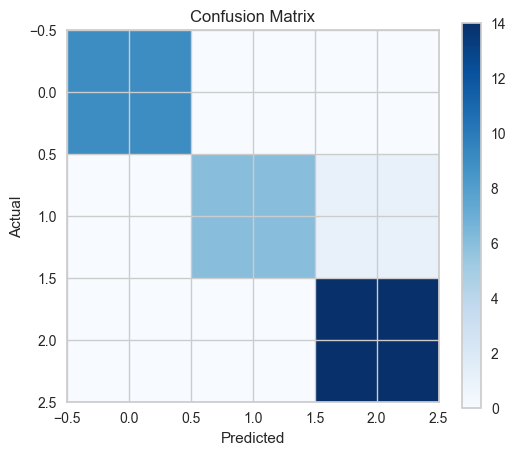

In [76]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [77]:
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.86      0.92         7
           2       0.93      1.00      0.97        14

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



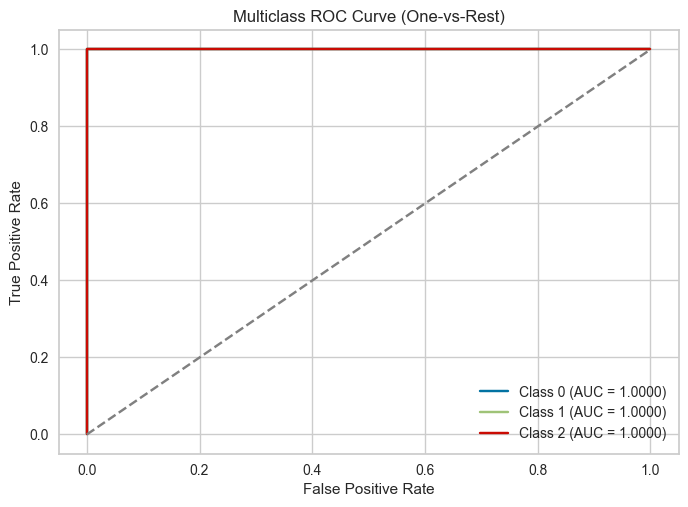

In [79]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
classes = sorted(y.unique())
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_proba = gbm.predict_proba(X_test)
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()


In [80]:
X_train.head()

,Nitrogen,Phosphorous,Potassium
137,4.707598,3.408714,2.981180
84,4.211348,2.470539,2.691896
27,3.905225,2.846000,2.090958
127,4.553550,3.804368,2.078305
132,4.630574,2.900240,1.916429


In [82]:
gbm.predict([[4.707598,3.408714,2.981180]])

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0])

In [83]:
import joblib
joblib.dump(gbm, 'gbm_model.pkl')
print("Model saved as 'gbm_model.pkl'")


Model saved as 'gbm_model.pkl'


In [84]:
Build an interface for the prediction of Soil Fertility using

SyntaxError: invalid syntax (214295042.py, line 1)

In [85]:
Build an interface for the prediction of Soil Fertility using
"AI Generated beautiful Background pictutre"
"User Enter the Value of Nitrogen , Phosphorous, Potassium in numeric form"
"Model Predict the value if "0 , Low Fertility" ,"1,Medium Fertility","2 , High Fertility"

SyntaxError: invalid syntax (2267133116.py, line 1)

In [86]:
import sklearn
print(sklearn.__version__)

1.4.2
